In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

import time

from math import *

In [2]:
weight=10

W=2*np.pi
dw=0.1*weight
T=(2*np.pi)/W
n=20
L=n*T

N_grid=8000
t=np.linspace(0,L,N_grid)
h=t[1]-t[0]

In [3]:
p=int(round(T/h))

st=200
fn=7799

In [4]:
sample=20
A_cuts=50

In [5]:
res=np.zeros((A_cuts, sample))
res2=np.zeros((A_cuts, sample))

In [12]:
D_s=np.linspace(4000, 10, A_cuts)

M=1.5

for jj in range(sample):
    q_s=[]
    q2_s=[]

    for ii in range(A_cuts):
        
        start=time.time()
        k0=np.zeros(N_grid, np.dtype(float))

        # здесь можно подумать над тем, как мы его инициализируем
        D=np.int_(round(D_s[ii]))
        sigma=1
        mu=2*dw
        xi=sigma*np.random.randn(N_grid+2*D)+mu

        for i in range(N_grid):
            k0[i]=np.mean(xi[i:i+2*D])

        k0[0]=2*dw
    
        k0_f=interpolate.interp1d(t, k0, bounds_error=False, fill_value="extrapolate")
        f=lambda t, x: 2*dw-k0_f(t)*sin(x)

        init=np.arcsin(2*dw/k0[0])

        theta=[0]*N_grid
        for i in range(N_grid):
            if i==0:
                theta[i]=init
            else:
                k1=f(t[i-1], theta[i-1])*h
                k2=f(t[i-1]+h/2, theta[i-1]+k1/2)*h
                k3=f(t[i-1]+h/2, theta[i-1]+k2/2)*h
                k4=f(t[i-1]+h, theta[i-1]+k3)*h

                theta[i]=theta[i-1]+(k1+2*k2+2*k3+k4)/6

        theta=np.array(theta)
        x0=np.sin(W*t)
        y0=np.sin(W*t+theta)

        C_0=[0]*N_grid

        for i in range(N_grid):
            if (t[i]-T/2>=0) and (t[i]+T/2<=L):
                C_0[i]=np.corrcoef(x0[i-int(p/2):i+int(p/2)], y0[i-int(p/2):i+int(p/2)])[0][1]
            else:
                C_0[i]=nan

        phi0=np.arccos(C_0)

        k_hat=np.divide(np.array([2*dw]*N_grid), np.sin(phi0))

        mk=np.array([np.mean(k0[st:fn])]*(fn-st))
        sk=(sum(np.multiply(k0[st:fn]-mk, k0[st:fn]-mk)*h))
        q=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk
        sk2=(sum(np.multiply(k0[st:fn], k0[st:fn])*h))
        q2=(sum(np.multiply(k_hat[st:fn]-k0[st:fn], k_hat[st:fn]-k0[st:fn])*h))/sk2
        q_s.append(q)
        q2_s.append(q2)
        stop=time.time()
        print(jj, '/', ii, D, ' ----- ', stop-start, '-------------', q, q2)
    res[:,jj]=q_s
    res2[:,jj]=q2_s
        
np.savetxt('PT2809_20_8000_q_D_cor(sec).out', res, delimiter=',')
np.savetxt('PT2809_20_8000_q2_D_cor(sec).out', res2, delimiter=',')

0 / 0 4000  -----  4.056757688522339 ------------- 7587.59334674 0.100469517805
0 / 1 3919  -----  4.041899681091309 ------------- 2.41566093748 4.59368551391e-05
0 / 2 3837  -----  4.0096800327301025 ------------- 1.10190181435 5.69895151408e-06
0 / 3 3756  -----  4.09140682220459 ------------- 2.39757876455 1.30903524856e-05
0 / 4 3674  -----  4.088694334030151 ------------- 1.73049964857 7.97246241165e-06
0 / 5 3593  -----  4.031068563461304 ------------- 1.04063466686 8.31744311945e-06
0 / 6 3511  -----  4.037955284118652 ------------- 1.25604522981 9.70989567579e-06
0 / 7 3430  -----  4.2609429359436035 ------------- 11339.532746 0.100354322265
0 / 8 3349  -----  4.580894231796265 ------------- 1.89322381938 1.49708542511e-05
0 / 9 3267  -----  4.52286171913147 ------------- 4.56356806598 1.28107646389e-05
0 / 10 3186  -----  4.388484716415405 ------------- 1.37019566189 2.66105736017e-05
0 / 11 3104  -----  4.360681533813477 ------------- 1.84243748333 6.82957310592e-06
0 / 12 30

1 / 49 10  -----  4.6788108348846436 ------------- 1.0002919587 0.0115433421499
2 / 0 4000  -----  4.725965738296509 ------------- 1.11321381388 3.29753818358e-05
2 / 1 3919  -----  4.7467567920684814 ------------- 23.1670346771 0.000296708731657
2 / 2 3837  -----  4.7548041343688965 ------------- 1.08087088008 5.75938938208e-06
2 / 3 3756  -----  4.203279495239258 ------------- 1.05653986516 2.18999122097e-05
2 / 4 3674  -----  4.16147255897522 ------------- 2.4383356923 2.97328087612e-05
2 / 5 3593  -----  4.0931549072265625 ------------- 26871.9899379 0.100832691773
2 / 6 3511  -----  4.005214691162109 ------------- 1.19096679957 1.62024814893e-05
2 / 7 3430  -----  4.082995176315308 ------------- 2.44531978965 3.02080576951e-05
2 / 8 3349  -----  4.046123504638672 ------------- 0.993094120278 1.13586802063e-05
2 / 9 3267  -----  4.018463850021362 ------------- 1.56843588441 3.01565739828e-05
2 / 10 3186  -----  4.087249517440796 ------------- 1.9380280858 7.29885069057e-06
2 / 11 3

3 / 49 10  -----  3.954742670059204 ------------- 0.999884948513 0.0123238947008
4 / 0 4000  -----  4.122922897338867 ------------- 1.03532304566 4.00226689195e-06
4 / 1 3919  -----  4.474623203277588 ------------- 17180.8582909 0.0994757344041
4 / 2 3837  -----  4.47309136390686 ------------- 2.3444556551 9.56801728549e-06
4 / 3 3756  -----  4.195495128631592 ------------- 2922.07058121 0.0158473967613
4 / 4 3674  -----  4.184781551361084 ------------- 22156.4004404 0.0999966405509
4 / 5 3593  -----  4.228313446044922 ------------- 11390.0608597 0.10072428995
4 / 6 3511  -----  4.8237926959991455 ------------- 9356.4413155 0.100688656775
4 / 7 3430  -----  4.659766912460327 ------------- 6040.6966329 0.10030734122
4 / 8 3349  -----  4.685415506362915 ------------- 18.7919651217 6.18069183153e-05
4 / 9 3267  -----  4.676297903060913 ------------- 1.06179163391 1.70529643633e-05
4 / 10 3186  -----  4.687039852142334 ------------- 1.02685763485 5.79462469976e-06
4 / 11 3104  -----  4.678

5 / 49 10  -----  3.961925983428955 ------------- 1.00452492358 0.0117023260533
6 / 0 4000  -----  4.009404420852661 ------------- 1.01396639199 5.82730620721e-06
6 / 1 3919  -----  4.013719081878662 ------------- 4.81965447431 1.14574984887e-05
6 / 2 3837  -----  3.9789669513702393 ------------- 1.21192768194 1.72721956505e-05
6 / 3 3756  -----  4.091159343719482 ------------- 2.76145694791 2.57948869303e-05
6 / 4 3674  -----  4.009365797042847 ------------- 27.4454717934 0.000412496935997
6 / 5 3593  -----  4.002902507781982 ------------- 1.39569135682 3.39613184453e-06
6 / 6 3511  -----  4.0418007373809814 ------------- 1.13897903992 4.46596220559e-06
6 / 7 3430  -----  4.036631107330322 ------------- 9531.90791883 0.0999459093362
6 / 8 3349  -----  4.0070250034332275 ------------- 1.34856077548 1.92750711898e-05
6 / 9 3267  -----  4.038913726806641 ------------- 17427.7489812 0.102090603186
6 / 10 3186  -----  3.9976751804351807 ------------- 7302.66592253 0.100998899226
6 / 11 310

7 / 48 91  -----  3.701017141342163 ------------- 64.1763519861 0.0998598454046
7 / 49 10  -----  3.6874496936798096 ------------- 0.997952909332 0.0131281888722
8 / 0 4000  -----  3.7343411445617676 ------------- 2.56638831061 1.49773347258e-05
8 / 1 3919  -----  3.751281499862671 ------------- 1.50657122501 1.24947914676e-05
8 / 2 3837  -----  3.742372989654541 ------------- 14215.9129393 0.101308122061
8 / 3 3756  -----  3.721583843231201 ------------- 5273.6891926 0.101803611076
8 / 4 3674  -----  3.7502360343933105 ------------- 1.27966155004 1.50444627332e-05
8 / 5 3593  -----  3.738121747970581 ------------- 1.26778482171 1.65053230455e-05
8 / 6 3511  -----  3.7882180213928223 ------------- 10862.2450957 0.101405549962
8 / 7 3430  -----  3.715946912765503 ------------- 5702.13783493 0.100838693261
8 / 8 3349  -----  3.733531951904297 ------------- 42279.6827038 0.100987974623
8 / 9 3267  -----  3.7891526222229004 ------------- 1.13805737018 4.8128256354e-05
8 / 10 3186  -----  3

9 / 47 173  -----  3.724196672439575 ------------- 1.81972667831 0.00103316268638
9 / 48 91  -----  3.6698622703552246 ------------- 1.06921119571 0.00165060678358
9 / 49 10  -----  3.6887521743774414 ------------- 1.00519112006 0.0122969320794
10 / 0 4000  -----  3.7218058109283447 ------------- 1.52189055605 4.42322240306e-06
10 / 1 3919  -----  3.709338665008545 ------------- 6.49917809022 2.46697762724e-05
10 / 2 3837  -----  3.7299654483795166 ------------- 2.40557801559 9.8148065728e-06
10 / 3 3756  -----  3.7192108631134033 ------------- 13952.6095624 0.101896463225
10 / 4 3674  -----  3.7380588054656982 ------------- 4615.53590342 0.103674835289
10 / 5 3593  -----  3.7316200733184814 ------------- 2932.05904491 0.101491214056
10 / 6 3511  -----  3.764993906021118 ------------- 2.40443399286 1.28555767381e-05
10 / 7 3430  -----  3.7155823707580566 ------------- 3765.65448507 0.077123857596
10 / 8 3349  -----  3.719944715499878 ------------- 5897.77274413 0.101823776164
10 / 9 32

11 / 45 336  -----  4.242647409439087 ------------- 1.68142138561 0.000499426102314
11 / 46 254  -----  4.287194490432739 ------------- 0.977403134558 0.000267908334107
11 / 47 173  -----  4.162529945373535 ------------- 0.999605272864 0.000820494942206
11 / 48 91  -----  4.210935831069946 ------------- 59.7326168753 0.0786474697627
11 / 49 10  -----  4.224159240722656 ------------- 8.81093912261 0.115730701081
12 / 0 4000  -----  4.224982500076294 ------------- 0.988706545496 1.04780306049e-05
12 / 1 3919  -----  4.267642498016357 ------------- 1.37744427722 7.80027856773e-06
12 / 2 3837  -----  4.214287519454956 ------------- 60962.1693871 0.10237759072
12 / 3 3756  -----  4.260168075561523 ------------- 1.20066954125 1.03081548453e-05
12 / 4 3674  -----  4.239796161651611 ------------- 2.99395133045 1.85553850917e-05
12 / 5 3593  -----  4.286501884460449 ------------- 1.16843145621 1.05387460821e-05
12 / 6 3511  -----  4.32999062538147 ------------- 2.52729080238 1.24748280033e-05
1

13 / 44 417  -----  4.260047197341919 ------------- 1.03093235776 0.000214617004574
13 / 45 336  -----  4.189414024353027 ------------- 0.967070607862 0.000708298645468
13 / 46 254  -----  4.309215545654297 ------------- 1.03461347738 0.000315352143102
13 / 47 173  -----  4.236302137374878 ------------- 1.00393702904 0.000597775305643
13 / 48 91  -----  4.128835439682007 ------------- 1.01004149151 0.00119075578349
13 / 49 10  -----  4.138594627380371 ------------- 0.994546677508 0.0113479739436
14 / 0 4000  -----  4.28943943977356 ------------- 2.23259394155 2.16630416616e-05
14 / 1 3919  -----  4.330124855041504 ------------- 1.51741750992 1.2940420619e-05
14 / 2 3837  -----  4.301850080490112 ------------- 1.40617642633 1.77303553095e-05
14 / 3 3756  -----  4.300719499588013 ------------- 1.47099307447 1.20687957359e-05
14 / 4 3674  -----  4.420866966247559 ------------- 6524.54395823 0.104060199861
14 / 5 3593  -----  4.422741651535034 ------------- 1.62472172861 2.02150714325e-05


15 / 42 580  -----  4.392755031585693 ------------- 529.111302197 0.103480238745
15 / 43 499  -----  4.297183275222778 ------------- 0.964355757712 0.000158712427373
15 / 44 417  -----  4.336792469024658 ------------- 569.022089795 0.103204009384
15 / 45 336  -----  4.3584980964660645 ------------- 1.00005902055 0.000243300353841
15 / 46 254  -----  4.4376983642578125 ------------- 236.134961188 0.101414450227
15 / 47 173  -----  4.323085784912109 ------------- 146.239362901 0.10115286433
15 / 48 91  -----  4.310220956802368 ------------- 60.1410511804 0.10204164391
15 / 49 10  -----  4.294478893280029 ------------- 0.996826227577 0.0123297054765
16 / 0 4000  -----  4.3603901863098145 ------------- 36349.490862 0.0913678020437
16 / 1 3919  -----  4.377891778945923 ------------- 0.967004246819 2.38051060655e-05
16 / 2 3837  -----  4.267772197723389 ------------- 40.2062333246 0.000109192696845
16 / 3 3756  -----  4.3781890869140625 ------------- 1732.17873771 0.0159963297879
16 / 4 3674

17 / 41 661  -----  3.9032602310180664 ------------- 472.385153438 0.100924346583
17 / 42 580  -----  3.7682268619537354 ------------- 0.993160816313 0.000338779558282
17 / 43 499  -----  3.814645528793335 ------------- 0.934753675151 0.000111175957818
17 / 44 417  -----  4.298856019973755 ------------- 1.06356713817 0.000993174017802
17 / 45 336  -----  4.433363199234009 ------------- 293.041334887 0.0995720839177
17 / 46 254  -----  4.340696573257446 ------------- 1.05050994984 0.000380832932884
17 / 47 173  -----  4.265258312225342 ------------- 125.245782738 0.0967761999019
17 / 48 91  -----  4.296192407608032 ------------- 60.2061126335 0.0944671003535
17 / 49 10  -----  4.247231960296631 ------------- 8.22787518118 0.111153226086
18 / 0 4000  -----  4.393267869949341 ------------- 1.73293881271 6.52428819697e-06
18 / 1 3919  -----  4.288707971572876 ------------- 2.32614515804 2.74217325486e-05
18 / 2 3837  -----  4.431126117706299 ------------- 1.27272575517 1.3001737911e-05
18 

19 / 40 743  -----  4.064653158187866 ------------- 0.940836814088 0.000191299129816
19 / 41 661  -----  4.095649003982544 ------------- 770.385829359 0.0988997828282
19 / 42 580  -----  4.049286127090454 ------------- 543.011488675 0.08397702107
19 / 43 499  -----  4.10344123840332 ------------- 1.02788927967 6.95944377419e-05
19 / 44 417  -----  4.092810153961182 ------------- 1.04030213704 0.00021990506859
19 / 45 336  -----  4.122044801712036 ------------- 0.989857645096 0.000296316044634
19 / 46 254  -----  4.027086496353149 ------------- 2.2572404589 0.000729920248116
19 / 47 173  -----  4.162183523178101 ------------- 97.1270004721 0.0986733859141
19 / 48 91  -----  4.112057209014893 ------------- 1.02599585915 0.00124160756042
19 / 49 10  -----  4.0500898361206055 ------------- 0.999434228211 0.0137685263925


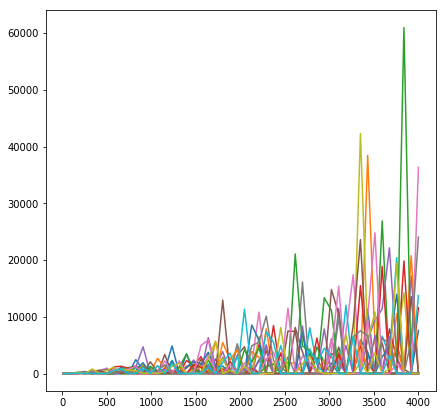

In [15]:
plt.figure(figsize=(7,7))
for i in range(sample):
    plt.plot(D_s, res[:, i])
#plt.plot(alpha_s, res2[:, -1])    
plt.show()

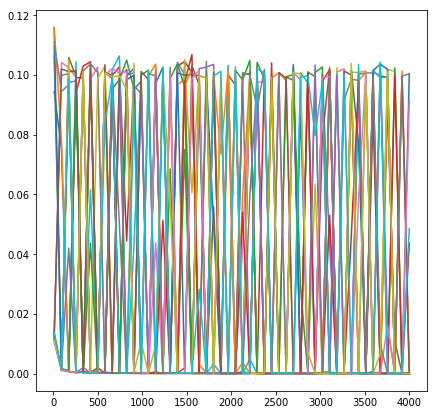

In [16]:
plt.figure(figsize=(7,7))
for i in range(sample):
    plt.plot(D_s, res2[:, i])
#plt.plot(alpha_s, res2[:, -1])    
plt.show()

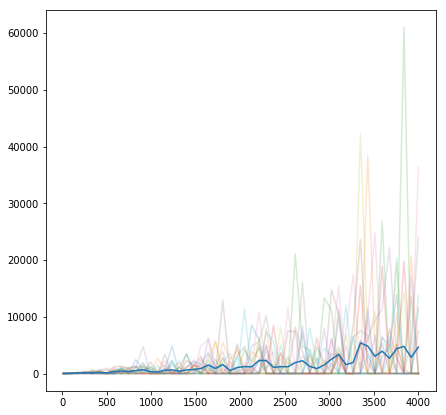

In [17]:
plt.figure(figsize=(7,7))
for i in range(sample):
    plt.plot(D_s, res[:, i], alpha=0.2)
plt.plot(D_s, np.mean(res, axis=1))
#plt.plot(alpha_s, res2[:, -1])    
plt.show()

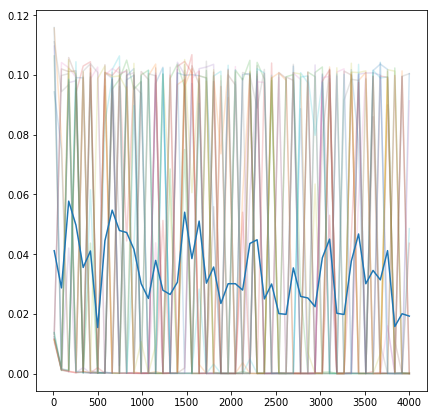

In [18]:
plt.figure(figsize=(7,7))
for i in range(sample):
    plt.plot(D_s, res2[:, i], alpha=0.2)
plt.plot(D_s, np.mean(res2, axis=1))    
plt.show()